In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

# Basic lib
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# config
import yaml

# Custom lib
from src.clustering import Clustering, GowerDistance, KPrototype
from src.clustering_preprocessor import ClusteringPreprocessor
from src.statistic_check import TTEST,ANOVA

from sklearn.preprocessing import MinMaxScaler

# ignore warnings
pd.set_option('mode.chained_assignment',  None)
pd.options.display.float_format = '{:.6f}'.format

In [4]:
def viz (df : pd.DataFrame, clus_col) :
    '''
    Input : 수치형 데이터 프레임, 군집화가 있는 Column 
    '''

    print('수치형 변수에 대해 시각화를 시작합니다.')
    from sklearn.decomposition import PCA

    con_cols = [i for i in df.columns if df[i].dtype != 'object' and i != 'user_id']

    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    feature_df = df.loc[:, con_cols]
    
    scaler = MinMaxScaler()
    scaled_feature_df = scaler.fit_transform(feature_df)
    



    # feature_df.dropna(axis=0, inplace=True)
    feature_df.reset_index(drop=True, inplace=True)

    pca_2 = PCA(n_components=2)
    pca_2_transformed = pca_2.fit_transform(scaled_feature_df)

    pca_2_df = pd.DataFrame({'x_axis' : pca_2_transformed[:,0],
                            'y_axis' : pca_2_transformed[:,1],
                            'Cluster' : df[clus_col]})

    pca_3 = PCA(n_components=3)
    pca_3_transformed = pca_3.fit_transform(scaled_feature_df)
    pca_3_df = pd.DataFrame({'x_axis' : pca_3_transformed[:, 0],
                    'y_axis' : pca_3_transformed[:, 1],
                    'z_axis' : pca_3_transformed[:, 2],
                    'Cluster' : df[clus_col]})


    for i in range(len(pca_2_df['Cluster'].unique())) :
        marker_i = pca_2_df[pca_2_df['Cluster'] == i].index
        ax1.scatter(x = pca_2_df.loc[marker_i, 'x_axis'],
                    y = pca_2_df.loc[marker_i, 'y_axis'],
                    label = f'Cluster {i}',
                    alpha = 0.3)

    ax1.set_title('Clustering 2D Visualization')
    ax1.legend()

    for i in range(len(pca_3_df['Cluster'].unique())) :
        marker_i = pca_3_df[pca_3_df['Cluster'] == i].index
        ax2.scatter(xs = pca_3_df.loc[marker_i, 'x_axis'],
                    ys= pca_3_df.loc[marker_i, 'y_axis'],
                    zs =  pca_3_df.loc[marker_i, 'z_axis'],
                    label = f'Cluster {i}',
                    alpha = 0.3)

    ax2.set_title('Clustering 3D Visualization')
    ax2.legend()

    plt.show()


In [4]:
def viz_with_something (df : pd.DataFrame, clus_col, something) :
    '''
    Input : 수치형 데이터 프레임, 군집화가 있는 Column 
    '''

    print('수치형 변수와 특정 변수에 대해 시각화를 시작합니다.')
    from sklearn.decomposition import PCA

    con_cols = [i for i in df.columns if df[i].dtype != 'object']

    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    feature_df = df.loc[:, con_cols]
    
    scaler = MinMaxScaler()
    scaled_feature_df = scaler.fit_transform(feature_df)
    



    # feature_df.dropna(axis=0, inplace=True)
    feature_df.reset_index(drop=True, inplace=True)

    pca_2 = PCA(n_components=2)
    pca_2_transformed = pca_2.fit_transform(scaled_feature_df)

    pca_2_df = pd.DataFrame({'x_axis' : pca_2_transformed[:,0],
                            'y_axis' : pca_2_transformed[:,1],
                            'Cluster' : df[clus_col],
                            something : df[something]})

    pca_3 = PCA(n_components=3)
    pca_3_transformed = pca_3.fit_transform(scaled_feature_df)
    pca_3_df = pd.DataFrame({'x_axis' : pca_3_transformed[:, 0],
                    'y_axis' : pca_3_transformed[:, 1],
                    'z_axis' : pca_3_transformed[:, 2],
                    'Cluster' : df[clus_col],
                    something : df[something]})


    for i in range(len(pca_2_df['Cluster'].unique())) :
        marker_i = pca_2_df[pca_2_df['Cluster'] == i].index
        ax1.scatter(x = pca_2_df.loc[marker_i, 'x_axis'],
                    y = pca_2_df.loc[marker_i, 'y_axis'],
                    label = f'Cluster {i}',
                    alpha = 0.3)

    for i in pca_2_df[something].unique() :
        marker_i = pca_2_df[pca_2_df[something] == i].index
        ax1.scatter(x = pca_2_df.loc[marker_i, 'x_axis'],
                    y = pca_2_df.loc[marker_i, 'y_axis'],
                    label = f'{something}_{i}',
                    alpha = 0.3)

    ax1.set_title('Clustering 2D Visualization')
    ax1.legend()

    for i in pca_3_df['Cluster'].unique() :
        marker_i = pca_3_df[pca_3_df['Cluster'] == i].index
        ax2.scatter(xs = pca_3_df.loc[marker_i, 'x_axis'],
                    ys= pca_3_df.loc[marker_i, 'y_axis'],
                    zs =  pca_3_df.loc[marker_i, 'z_axis'],
                    label = f'Cluster {i}',
                    alpha = 0.5)

    for i in pca_3_df[something].unique() :
        marker_i = pca_3_df[pca_3_df[something] == i].index
        ax2.scatter(xs = pca_3_df.loc[marker_i, 'x_axis'],
                    ys= pca_3_df.loc[marker_i, 'y_axis'],
                    zs =  pca_3_df.loc[marker_i, 'z_axis'],
                    label = f'{something}_{i}',
                    alpha = 0.5)

    ax2.set_title('Clustering 3D Visualization')
    ax2.legend()

    plt.show()


# Normal Clustering

전처리 시작...
결측치 제거 전 :  3025600
결측치 제거 후 :  0
Data Size 줄이는 중...


C:\Users\JeongSeongYun\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
c:\Users\JeongSeongYun\anaconda3\envs\bigcon\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\JeongSeongYun\anaconda3\envs\bigcon\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Scaling 완료
총 4개의 DataFrame이 나왔습니다. shape : (118255, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118255 entries, 0 to 118254
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   gender_0.0                               118255 non-null  float32
 1   gender_1.0                               118255 non-null  float32
 2   income_type_EARNEDINCOME                 118255 non-null  float32
 3   income_type_EARNEDINCOME2                118255 non-null  float32
 4   income_type_FREELANCER                   118255 non-null  float32
 5   income_type_PRACTITIONER                 118255 non-null  float32
 6   income_type_PRIVATEBUSINESS              118255 non-null  float32
 7   employment_type_계약직                      118255 non-null  float32
 8   employment_type_기타                       118255 non-null  float32
 9   employment_type_일용직                      118255

Progress bar: 100%|██████████| 36/36 [00:33<00:00,  1.09it/s]


Selected Columns
 Index(['age', 'yearly_income', 'credit_score', 'existing_loan_amt',
       'existing_loan_percent', 'income_per_credit', 'desired_amount',
       'existing_loan_cnt', 'service_year', 'personal_rehabilitation_yn_0.0'],
      dtype='object')


Progress bar: 100%|██████████| 36/36 [00:19<00:00,  1.82it/s]


Selected Columns
 Index(['age', 'yearly_income', 'credit_score', 'existing_loan_amt',
       'existing_loan_percent', 'income_per_credit', 'desired_amount',
       'existing_loan_cnt', 'service_year', 'personal_rehabilitation_yn_0.0'],
      dtype='object')


Progress bar: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]


Selected Columns
 Index(['age', 'yearly_income', 'credit_score', 'existing_loan_amt',
       'existing_loan_percent', 'income_per_credit', 'desired_amount',
       'existing_loan_cnt', 'service_year', 'personal_rehabilitation_yn_0.0'],
      dtype='object')


Progress bar: 100%|██████████| 36/36 [00:19<00:00,  1.86it/s]


Selected Columns
 Index(['credit_score', 'existing_loan_percent', 'existing_loan_amt',
       'desired_amount', 'existing_loan_cnt', 'service_year', 'gender_0.0',
       'income_type_PRIVATEBUSINESS', 'personal_rehabilitation_yn_0.0',
       'income_type_EARNEDINCOME'],
      dtype='object')
시각화를 시작합니다...
현재 Scaler :  StandardScaler


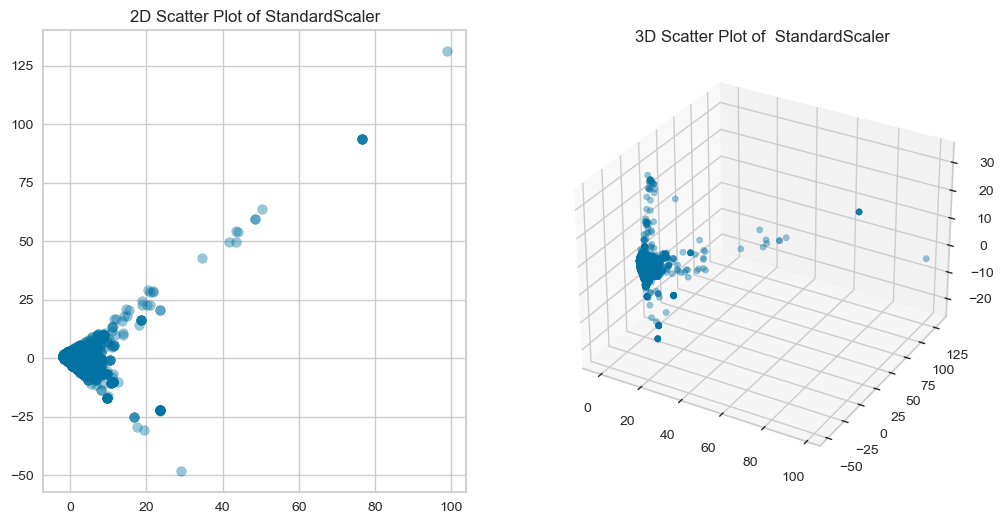

현재 Scaler :  MinMaxScaler


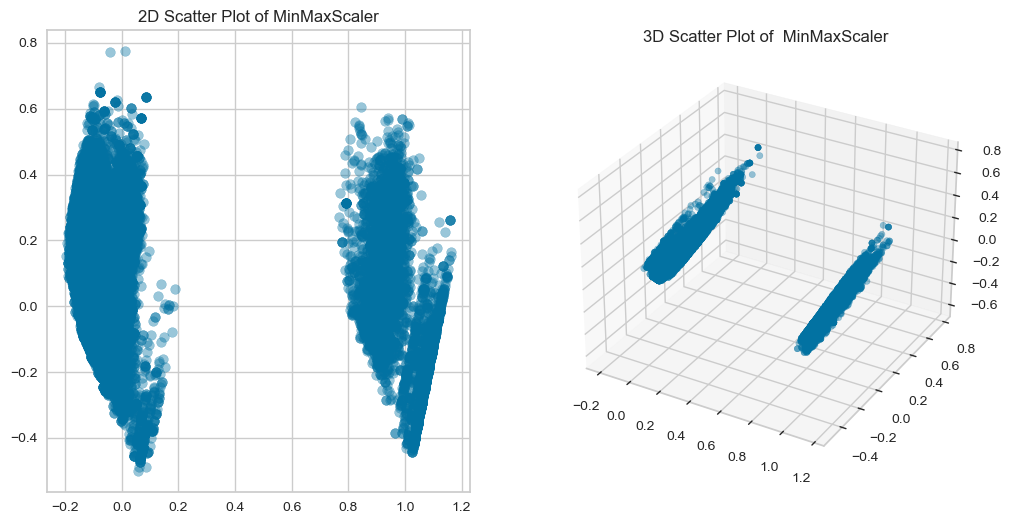

현재 Scaler :  RobustScaler


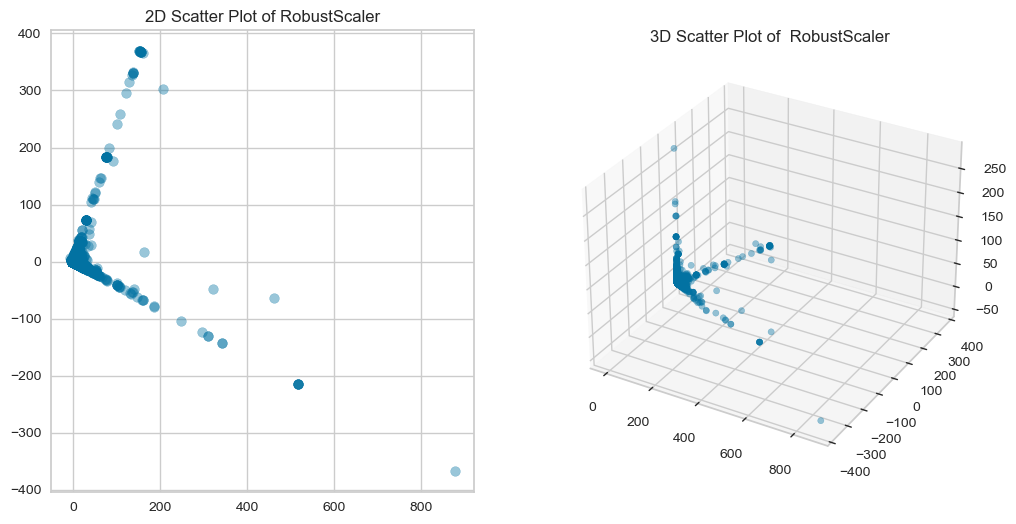

현재 Scaler :  PowerTransformer


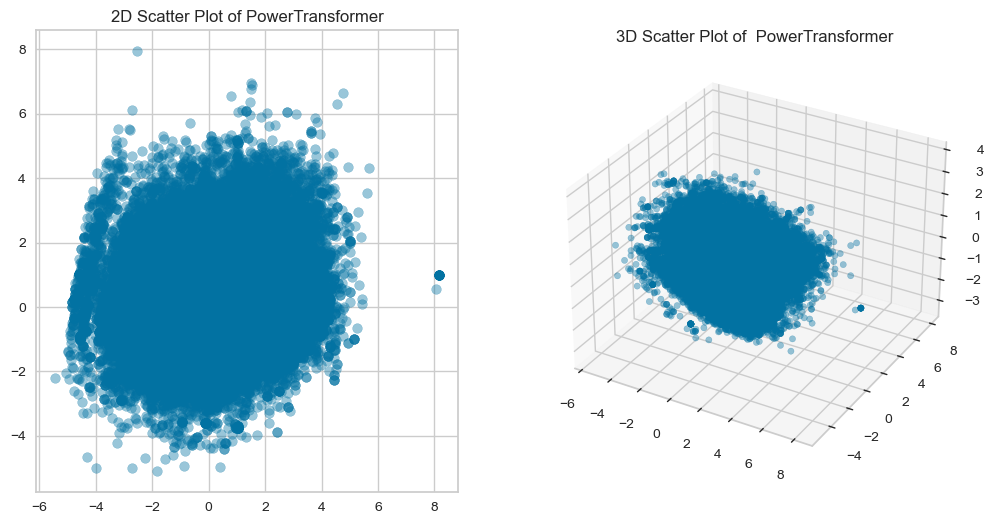

Selection 결과 DF List를 반환합니다.


In [7]:
df = pd.read_csv('./data/user_spec.csv')

clus_prep = ClusteringPreprocessor(df, selection=True)

prep_df_lst, fitted_scalers, prep_df = clus_prep.run()


K-Means로 군집화 수행 중...


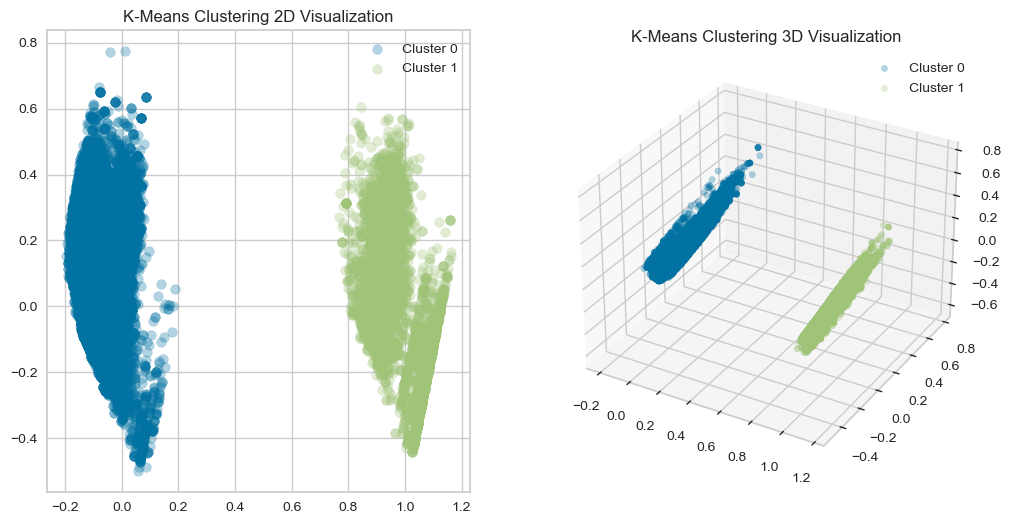

Gaussian Mixture로 군집화 중...


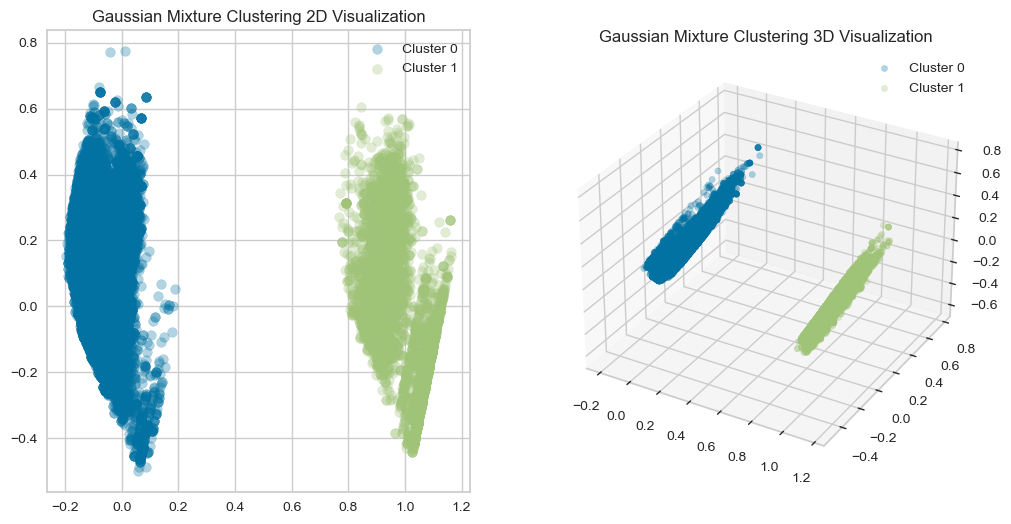

,age,yearly_income,credit_score,existing_loan_amt,existing_loan_percent,income_per_credit,desired_amount,existing_loan_cnt,service_year,personal_rehabilitation_yn_0.0,KM,GM
0,0.049180,0.003821,0.588889,0.005057,0.000997,0.001726,0.0005,0.000000,0.019231,1.0,0,0
1,0.049180,0.002948,0.477778,0.006005,0.001521,0.001593,0.0003,0.017544,0.000000,1.0,0,0
2,0.377049,0.006114,0.600000,0.019595,0.002439,0.002708,0.0025,0.013158,0.000000,1.0,0,0
3,0.213115,0.001201,0.511111,0.007269,0.004297,0.000627,0.0003,0.039474,0.019231,1.0,0,0
4,0.360656,0.006551,0.466667,0.030341,0.003529,0.003577,0.0005,0.026316,0.057692,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118250,0.213115,0.000109,0.544444,0.001896,0.006726,0.000072,0.0050,0.004386,0.096154,0.0,1,1
118251,0.278688,0.002620,0.577778,0.002845,0.000807,0.001208,0.0030,0.008772,0.038462,1.0,0,0
118252,0.147541,0.004258,0.544444,0.023072,0.004092,0.002053,0.0003,0.030702,0.019231,1.0,0,0
118253,0.213115,0.003603,0.555556,0.014539,0.003034,0.001711,0.0001,0.017544,0.019231,1.0,0,0


In [9]:
clus = Clustering(prep_df_lst[1], scaled=True, num_clus=2)

fin_df = clus.run()
fin_df

In [40]:
fin_df_con_features = fin_df.drop(['GM','KM','personal_rehabilitation_yn_0.0'], axis=1).columns
rescaled = fitted_scalers[1].inverse_transform(fin_df.loc[:,fin_df_con_features])
ori_df = pd.DataFrame(rescaled, columns = fin_df_con_features)
ori_df['personal_rehabilitation_yn_0.0'] = fin_df['personal_rehabilitation_yn_0.0']
ori_df['KM'] = fin_df['KM']
ori_df['GM'] = fin_df['GM']
ori_df

,age,yearly_income,credit_score,existing_loan_amt,existing_loan_percent,income_per_credit,desired_amount,existing_loan_cnt,service_year,personal_rehabilitation_yn_0.0,KM,GM
0,22.000000,103.439240,5394632704.000000,0.262958,9965122.000000,1.393429,1582000.125000,1063.829834,8.576923,1.000000,0,0
1,22.000000,102.653122,4376966144.000000,0.312263,15214606.000000,1.363173,949200.062500,571220.625000,0.000000,1.000000,0,0
2,42.000000,105.502785,5496399360.000000,1.018963,24388328.000000,1.617365,7910000.000000,428681.406250,0.000000,1.000000,0,0
3,32.000000,101.080902,4682266624.000000,0.378003,42974588.000000,1.142871,949200.062500,1283916.500000,8.576923,1.000000,0,0
4,41.000000,105.895844,4275199744.000000,1.577750,35286336.000000,1.815522,1582000.125000,856299.000000,25.730770,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118250,32.000000,100.098259,4987566080.000000,0.098609,67264576.000000,1.016318,15820000.000000,143603.015625,42.884613,0.000000,1,1
118251,36.000000,102.358337,5292866560.000000,0.147914,8071749.500000,1.275424,9492000.000000,286142.218750,17.153847,1.000000,0,0
118252,28.000000,103.832291,4987566080.000000,1.199747,40919288.000000,1.468171,949200.062500,998838.187500,8.576923,1.000000,0,0
118253,32.000000,103.242706,5089333248.000000,0.756005,30335004.000000,1.390088,316400.000000,571220.625000,8.576923,1.000000,0,0


In [ ]:
ori_df = ori_df.drop(['GM'], axis=1)

In [54]:
ttest = TTEST(ori_df, 'KM')
ttest_df = ttest.check_ttest()
ttest_df

,P-Value,유의함_여부
age,0.000000,True
yearly_income,0.973954,False
credit_score,0.000000,True
existing_loan_amt,0.000000,True
existing_loan_percent,0.000030,True
income_per_credit,0.000000,True
desired_amount,0.419273,False
existing_loan_cnt,0.000000,True
service_year,0.000000,True
personal_rehabilitation_yn_0.0,0.000000,True


# K-Prototype

## user_spec


In [15]:
df = pd.read_csv('./data/user_spec.csv')

kproto = KPrototype(df, n_clus = 3)

kproto_clus_df, group_by = kproto.run()
kproto_clus_df

전처리중...
K-Prototype으로 군집화 중..., 군집 수 : 3
Initialization method and algorithm are deterministic. Setting n_init to 1.

Preprocessed Data Frame's Columns
Index(['gender', 'income_type', 'employment_type', 'houseown_type', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'age', 'credit_score', 'yearly_income', 'service_year',
       'desired_amount', 'existing_loan_cnt', 'existing_loan_amt'],
      dtype='object')

Detected Categorical Features Index are... [0, 1, 2, 3, 4, 5, 6] 
 Is it right? [y/n]
y
Start K-Prototype Clustering...
Best run was number 4


,user_id,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,service_year,KProto
0,33400,M,630.000000,36000000.000000,EARNEDINCOME,정규직,기타가족소유,5000000.000000,생활비,N,N,1.000000,16000000.000000,22.000000,1.000000,1
1,646289,M,530.000000,28000000.000000,EARNEDINCOME,계약직,기타가족소유,3000000.000000,생활비,N,N,5.000000,19000000.000000,22.000000,0.000000,1
2,555995,M,640.000000,57000000.000000,EARNEDINCOME,계약직,전월세,25000000.000000,대환대출,N,N,4.000000,62000000.000000,42.000000,0.000000,2
3,168234,F,560.000000,12000000.000000,EARNEDINCOME2,기타,기타가족소유,3000000.000000,생활비,N,N,10.000000,23000000.000000,32.000000,1.000000,1
4,796103,M,520.000000,61000000.000000,EARNEDINCOME,정규직,전월세,5000000.000000,생활비,N,N,7.000000,96000000.000000,41.000000,3.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118683,675577,M,590.000000,2000000.000000,FREELANCER,기타,기타가족소유,50000000.000000,생활비,Y,N,2.000000,6000000.000000,32.000000,5.000000,1
118684,303899,M,620.000000,25000000.000000,EARNEDINCOME,정규직,기타가족소유,30000000.000000,대환대출,N,N,3.000000,9000000.000000,36.000000,2.000000,2
118685,28718,M,590.000000,40000000.000000,EARNEDINCOME,계약직,전월세,3000000.000000,생활비,N,N,8.000000,73000000.000000,28.000000,1.000000,1
118686,659656,F,600.000000,34000000.000000,EARNEDINCOME,정규직,기타가족소유,1000000.000000,생활비,N,N,5.000000,46000000.000000,32.000000,1.000000,1


In [18]:
kproto_clus_df = kproto_clus_df.drop(['user_id'], axis=1)
kproto_clus_df.groupby('KProto').agg(['mean']).T

,KProto,0,1,2
credit_score,mean,697.970956,628.039571,573.255332
yearly_income,mean,79254457.442517,32639857.728250,41965131.375580
desired_amount,mean,72659056.070996,19925185.615947,23156414.219474
existing_loan_cnt,mean,7.547317,4.050877,5.237898
existing_loan_amt,mean,208217507.059298,38111707.666716,59369582.689335
age,mean,39.812747,27.899747,41.013076
service_year,mean,9.788140,1.374843,2.789954


In [19]:
anova = ANOVA(kproto_clus_df, clus_col='KProto')
anova_df = anova.check_anova()
anova_df


,P-Value,유의함_여부
credit_score,0.000000,True
yearly_income,0.000000,True
desired_amount,0.000000,True
existing_loan_cnt,0.000000,True
existing_loan_amt,0.000000,True
age,0.000000,True
service_year,0.000000,True


수치형 변수에 대해 시각화를 시작합니다.


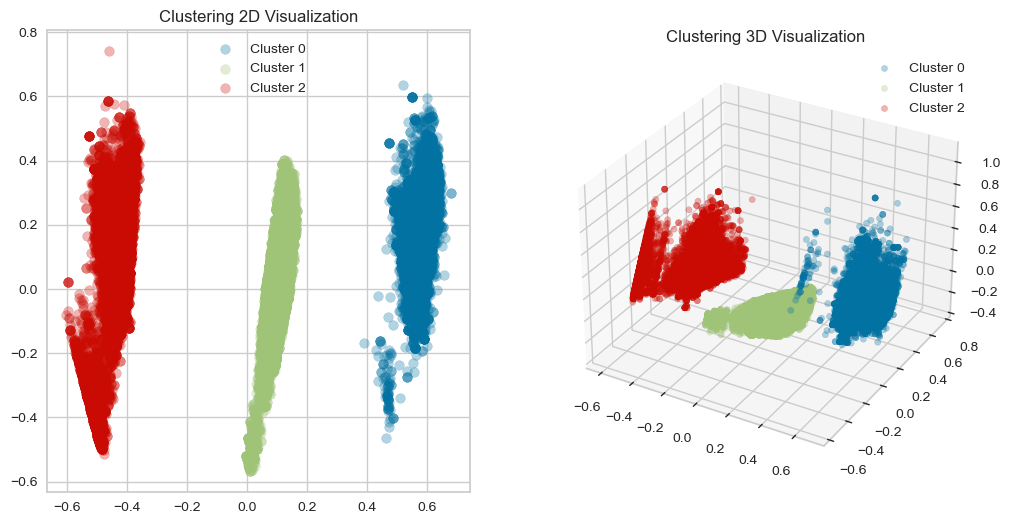

In [20]:
viz(kproto_clus_df, 'KProto')